## Equal-width discretization

* Definition 
  * Divides the scope of possible values into N bins of the same size 
  * Interval width = (max value - min value)/N
  * N is the number of bins or intervals (arbitrarly determined by user)
* Summary 
  * Does not improve value spread 
  * Handles outliers 
  * Creates discrete variables
  * Good to combine with categorical encoding

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer 


In [8]:
df = pd.read_csv('../data/house_price/train.csv', index_col='Id')

In [9]:
df.select_dtypes('number')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


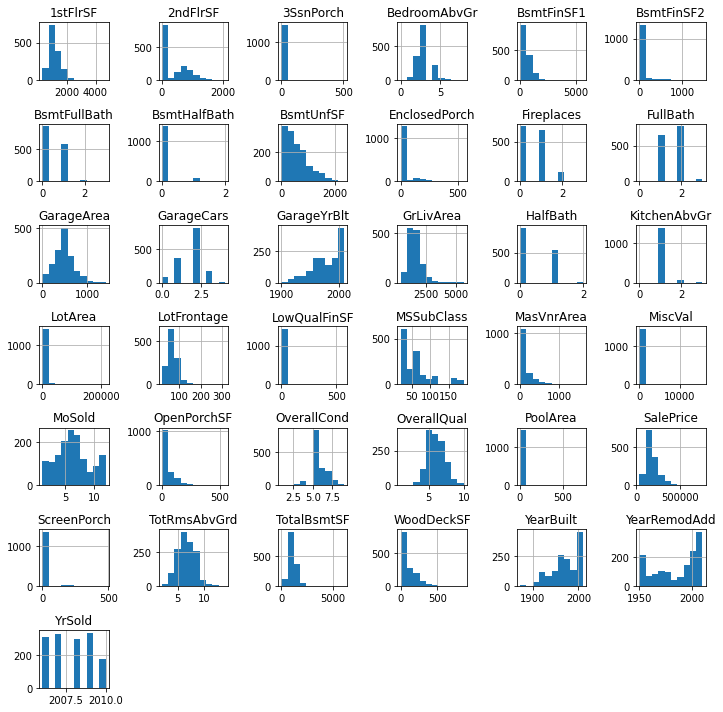

In [15]:
ax = df.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

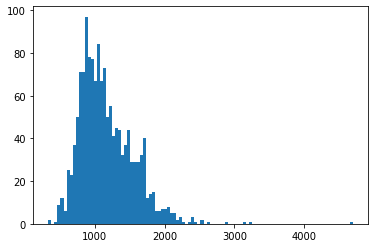

In [22]:
plt.subplots()
plt.hist(df['1stFlrSF'],bins=100)
plt.show()

# Split data

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='SalePrice'), 
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

# Pandas

In [45]:
col = '1stFlrSF'
new_col = col + '_disc'

# get interval 
min_val = X_train[col].min()
max_val = X_train[col].max()
interval = int((max_val - min_val)/10) # n_bins = 10 

# get start and end of all intervals  
intervals = [i for i in range(min_val, max_val+interval, interval)]
# labels for each interval
labels = [f'bin_{i}' for i in range(len(intervals)-1)]


# cut 
X_train[new_col] = pd.cut(X_train[col], bins=intervals, labels=labels)
X_test[new_col] = pd.cut(X_test[col], bins=intervals, labels=labels)



In [46]:
X_train[[col, new_col]].head()

,1stFlrSF,1stFlrSF_disc
Id,,
65,1057,bin_2
683,1291,bin_3
961,858,bin_1
1385,698,bin_1
1101,438,bin_0


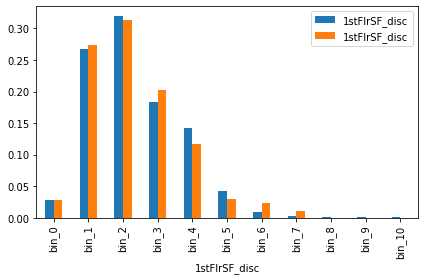

In [53]:
# compare train and test data distribution 
t1 = X_train.groupby([new_col])[new_col].count()/len(X_train)
t2 = X_test.groupby([new_col])[new_col].count()/len(X_test)

temp = pd.concat([t1, t2], axis=1)
temp.plot.bar()

plt.tight_layout()
plt.show()

# sklearn

In [61]:
new_col = col + '_disc_sk'

In [57]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [59]:
disc.fit(X_train[[col]])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [63]:
X_train[new_col] = disc.transform(X_train[[col]])
X_test[new_col] = disc.transform(X_test[[col]])

In [65]:
X_train[[col, new_col]].head()

,1stFlrSF,1stFlrSF_disc_sk
Id,,
65,1057,2.0
683,1291,3.0
961,858,1.0
1385,698,1.0
1101,438,0.0


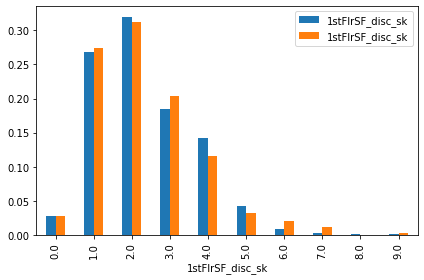

In [64]:
# compare train and test data distribution 
t1 = X_train.groupby([new_col])[new_col].count()/len(X_train)
t2 = X_test.groupby([new_col])[new_col].count()/len(X_test)

temp = pd.concat([t1, t2], axis=1)
temp.plot.bar()

plt.tight_layout()
plt.show()